In [0]:
# By Liubov Tovin
# Implement rolling window Linear Regressor to predict next day close price for IBM stock

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
ibm_df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/IBMStockData.csv')

In [141]:
ibm_df[:1]

,DateTime,Open,High,Low,Close,Volume,Polarity
0,04-01-2016 09:03,112.28,112.28,112.28,112.28,120,0.0


In [142]:
type(ibm_df.loc[0,'DateTime'])

str

In [143]:
ibm_df.loc[0,'DateTime'][:-6]

'04-01-2016'

In [144]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427624 entries, 0 to 427623
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DateTime  427624 non-null  object 
 1   Open      427624 non-null  float64
 2   High      427624 non-null  float64
 3   Low       427624 non-null  float64
 4   Close     427624 non-null  float64
 5   Volume    427624 non-null  int64  
 6   Polarity  427624 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ MB


In [0]:
ibm_df['Date']=ibm_df['DateTime'].str[:-6]

In [148]:
ibm_df.head()

,DateTime,Open,High,Low,Close,Volume,Polarity,Date
0,04-01-2016 09:03,112.28,112.28,112.28,112.28,120,0.000000,04-01-2016
1,04-01-2016 09:30,112.53,112.70,112.28,112.30,134096,0.103571,04-01-2016
2,04-01-2016 09:31,112.28,112.36,112.15,112.17,20521,0.103571,04-01-2016
3,04-01-2016 09:32,112.17,112.36,112.17,112.33,20044,0.103571,04-01-2016
4,04-01-2016 09:33,112.32,112.36,112.12,112.25,21591,0.103571,04-01-2016


In [0]:
ibm_daily = ibm_df.groupby('Date',as_index=False).count()

In [150]:
ibm_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 1086
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1087 non-null   object
 1   DateTime  1087 non-null   int64 
 2   Open      1087 non-null   int64 
 3   High      1087 non-null   int64 
 4   Low       1087 non-null   int64 
 5   Close     1087 non-null   int64 
 6   Volume    1087 non-null   int64 
 7   Polarity  1087 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 76.4+ KB


In [151]:
ibm_daily.head()

,Date,DateTime,Open,High,Low,Close,Volume,Polarity
0,01-02-2016,392,392,392,392,392,392,392
1,01-02-2017,394,394,394,394,394,394,394
2,01-02-2018,392,392,392,392,392,392,392
3,01-02-2019,393,393,393,393,393,393,393
4,01-03-2016,393,393,393,393,393,393,393


In [0]:
# Train-test split
# Take first 30% of records as an initial trainign set
train_size = 99 #len(ibm_df)*3//10
train_X = ibm_df.loc[:train_size, ['Open','High','Low','Volume']]
train_y = ibm_df.loc[:train_size, 'Close']

#test_X = ibm_df.loc[train_size+1:, ['Open','High','Low','Volume']]
#test_y = ibm_df.loc[train_size+1:, 'Close']

In [71]:
print(len(train_y))
print(len(test_y))

100
299337


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

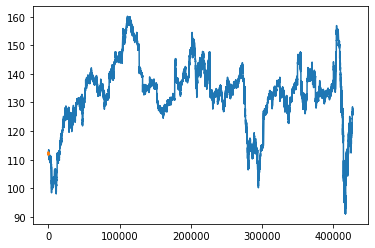

In [73]:
plt.plot(ibm_df['Close'])
plt.plot(train_y)

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [0]:
def train_over_window(w,df):
    N = len(df)
    predictions = []
    true = []
    for t in range(N-w-1):
        X_train = df.loc[t:t+w-1, ['Open','High','Low','Volume']].values.reshape(-1,4)
        y_train = df.loc[t:t+w-1, 'Close'].values  
        
        X_test = df.loc[t+w, ['Open','High','Low','Volume']].values.reshape(-1,4)
        y_test = df.loc[t+w, 'Close']   
        
        lr_w = lr.fit(X_train,y_train)

        true.append(y_test)
        predictions.append(lr_w.predict(X_test))
        
    return predictions, true

In [0]:
y_pred, y_test = train_over_window(100,ibm_df)

In [100]:
len(y_pred)

427523

In [113]:
type(y_pred[0])

numpy.ndarray

In [114]:
y_pred[0].shape

(1,)

In [103]:
y_pred[:4]

[array([111.69805285]),
 array([111.69874515]),
 array([111.72458327]),
 array([111.80002219])]

In [105]:
y_pred[0][0]

111.69805285393458

In [0]:
import pickle

In [0]:
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred.pickle', 'wb') as f:
    pickle.dump(y_pred, f)

In [0]:
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

In [110]:
len(y_pred)

427523

In [111]:
len(y_test)

427523

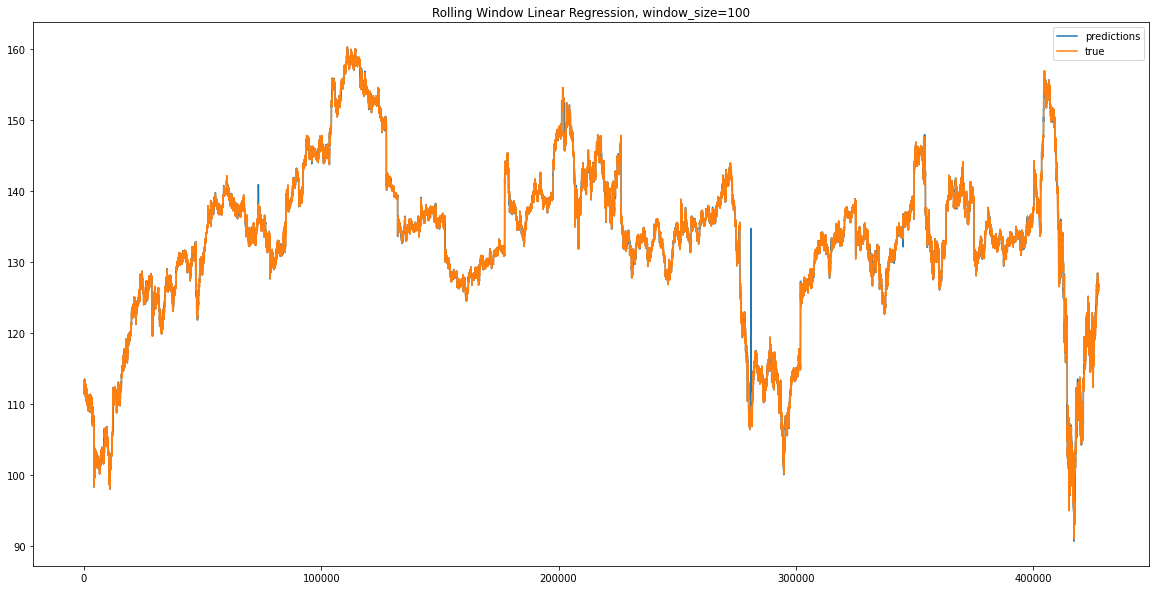

In [123]:
y_hat = np.asarray(y_pred).reshape(-1)
plt.figure(figsize=(20,10))
plt.plot(y_hat, label='predictions')
plt.plot(y_test, label='true')
plt.title('Rolling Window Linear Regression, window_size=100')
plt.xlabel('Timesteps')
plt.ylabel('Close Price for ')
plt.legend()
plt.show()

In [0]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat, squared=True)
rmse = mean_squared_error(y_test, y_hat, squared=False)


In [122]:
print('Mean Squared Error = ',mse)
print('Root Mean Squares Error = ', rmse)

Mean Squared Error =  0.0029935412955426934
Root Mean Squares Error =  0.05471326434734719


In [0]:
# Now, add new's sentiment polarity to the features
def train_over_window_polarity(w,df):
    N = len(df)
    predictions = []
    true = []
    for t in range(N-w-1):
        X_train = df.loc[t:t+w-1, ['Open','High','Low','Volume','Polarity']].values.reshape(-1,5)
        y_train = df.loc[t:t+w-1, 'Close'].values  
        
        X_test = df.loc[t+w, ['Open','High','Low','Volume','Polarity']].values.reshape(-1,5)
        y_test = df.loc[t+w, 'Close']   
        
        lr_w = lr.fit(X_train,y_train)

        true.append(y_test)
        predictions.append(lr_w.predict(X_test))
        
    return predictions, true

In [0]:
y_pred_polarity, _ = train_over_window_polarity(100,ibm_df)

In [0]:
with open(r'/content/drive/My Drive/Colab Notebooks/cmpe-256/y_pred_polarity.pickle', 'wb') as f:
    pickle.dump(y_pred_polarity, f)

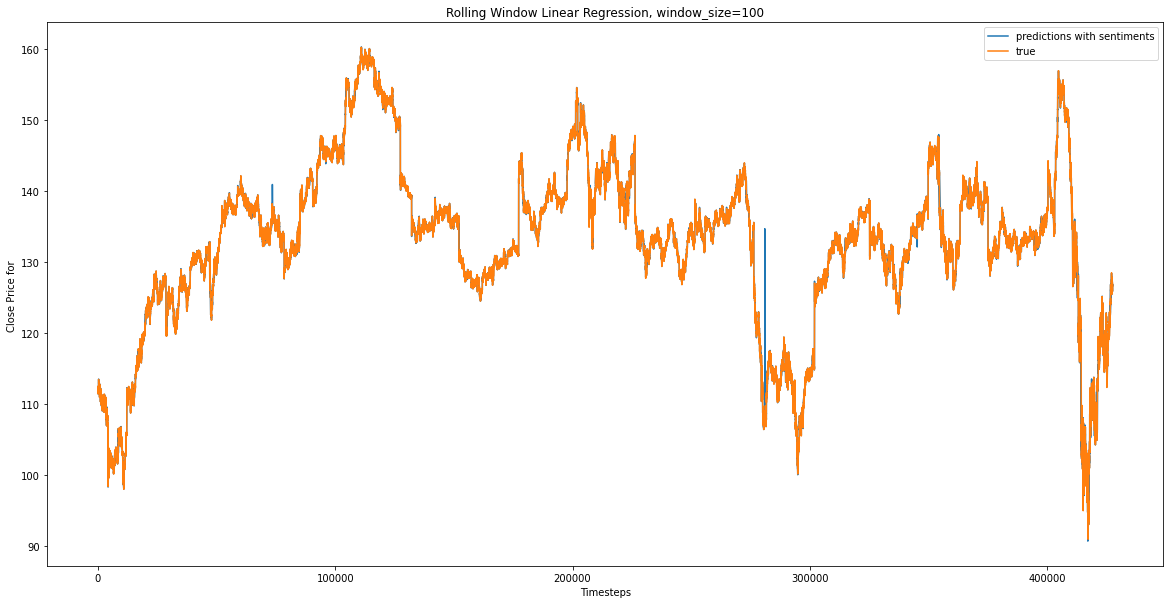

In [163]:
y_hat_polarity = np.asarray(y_pred_polarity).reshape(-1)
plt.figure(figsize=(20,10))

#plt.plot(y_hat, label='predictions')
plt.plot(y_hat_polarity, label='predictions with sentiments')
plt.plot(y_test, label='true')

plt.title('Rolling Window Linear Regression, window_size=100')
plt.xlabel('Timesteps')
plt.ylabel('Close Price for ')
plt.legend()
plt.show()

In [162]:
mse = mean_squared_error(y_test, y_hat_polarity, squared=True)
rmse = mean_squared_error(y_test, y_hat_polarity, squared=False)
print('Mean Squared Error with sentiments = ',mse)
print('Root Mean Squares Error with sentiments = ', rmse)

Mean Squared Error with sentiments =  0.003005599243462405
Root Mean Squares Error with sentiments =  0.05482334578865472


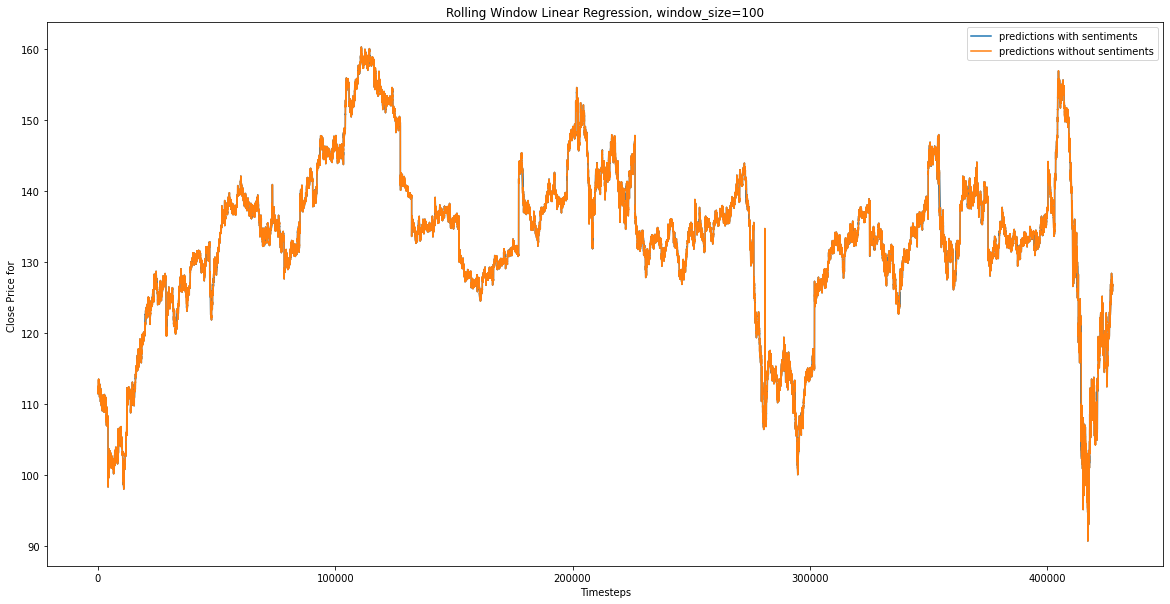

In [165]:
plt.figure(figsize=(20,10))

plt.plot(y_hat_polarity, label='predictions with sentiments')
plt.plot(y_hat, label='predictions without sentiments')

plt.title('Rolling Window Linear Regression, window_size=100')
plt.xlabel('Timesteps')
plt.ylabel('Close Price for ')
plt.legend()
plt.show()

In [166]:
mse = mean_squared_error(y_hat, y_hat_polarity, squared=True)
print('Mean Squared Error between predictoin with and without sentiments = ',mse)

Mean Squared Error between predictoin with and without sentiments =  1.6359889726296477e-05
